In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
# Data Reading 

import os
from glob import glob
from PIL import Image



In [27]:
# Data Processing 
import numpy as np
import pandas as pd
import cv2
import random
import albumentations as A

AttributeError: module 'cv2' has no attribute 'BORDER_REFLECT_101'

In [24]:
# Data Analysis

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Data Modeling & Model Evaluation

from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score

In [11]:
# Grad-CAM

import keras
import matplotlib.cm as cm


In [12]:
# Reading the data
# This method is basically assigining negative result to the Normal images in the directory 
# C:\Users\hp\Desktop\MinorProject\COVID-19_Radiography_Dataset\Normal
# Also it is assigning positive result to the COVID images in the directory
# C:\Users\hp\Desktop\MinorProject\COVID-19_Radiography_Dataset\COVID
levels = ['Normal', 'COVID']
path = "C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append(['{}/{}'.format(level, file), level])

data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])

data['path'] = path + '/' + data['image_file']
data['corona_result'] = data['corona_result'].map({'Normal': 'Negative', 'COVID': 'Positive'})
samples = 13808

data.head()

# data.sample()
# The above method is similar to training model.

image_file corona_result  \
0      Normal/Normal-1.png      Negative   
1     Normal/Normal-10.png      Negative   
2    Normal/Normal-100.png      Negative   
3   Normal/Normal-1000.png      Negative   
4  Normal/Normal-10000.png      Negative   

                                                path  
0  C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...  
1  C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...  
2  C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...  
3  C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...  
4  C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...

In [13]:
# Printing the number of duplicated samples and the total number of samples.
print('Number of Duplicated Samples: %d'%(data.duplicated().sum()))
print('Number of Total Samples: %d'%(data.isnull().value_counts()))

Number of Duplicated Samples: 0
Number of Total Samples: 13808


# EXPLORATORY DATA ANALYSIS

In [14]:
# Count Plot
# Showing the count of the plot and showing the number of covid positive and negative cases.
df = pd.DataFrame()
df['corona_result'] = ['Positive', 'Negative']
df['Count'] = [len(data[data['corona_result'] == 'Positive']), len(data[data['corona_result'] == 'Negative'])]
df = df.sort_values(by = ['Count'], ascending = False)

fig = px.bar(df, x = 'corona_result', y = 'Count', 
             color = "corona_result", text_auto='', width = 600, 
             color_discrete_sequence = ["orange", "purple"],
             template = 'plotly_dark')

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)

fig.show()

In [15]:
#Image Samples
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))

data.head()

image_file corona_result  \
0      Normal/Normal-1.png      Negative   
1     Normal/Normal-10.png      Negative   
2    Normal/Normal-100.png      Negative   
3   Normal/Normal-1000.png      Negative   
4  Normal/Normal-10000.png      Negative   

                                                path  \
0  C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...   
1  C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...   
2  C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...   
3  C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...   
4  C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...   

                                               image  
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1  [[9, 9, 9, 8, 8, 7, 6, 4, 3, 2, 1, 1, 1, 0, 0,...  
2  [[0, 0, 0, 0, 12, 57, 75, 95, 111, 117, 119, 1...  
3  [[0, 6, 23, 51, 66, 69, 71, 67, 97, 96, 101, 1...  
4  [[136, 118, 106, 100, 96, 93, 91, 88, 87, 87, ...

AttributeError: module 'cv2' has no attribute 'cv2'

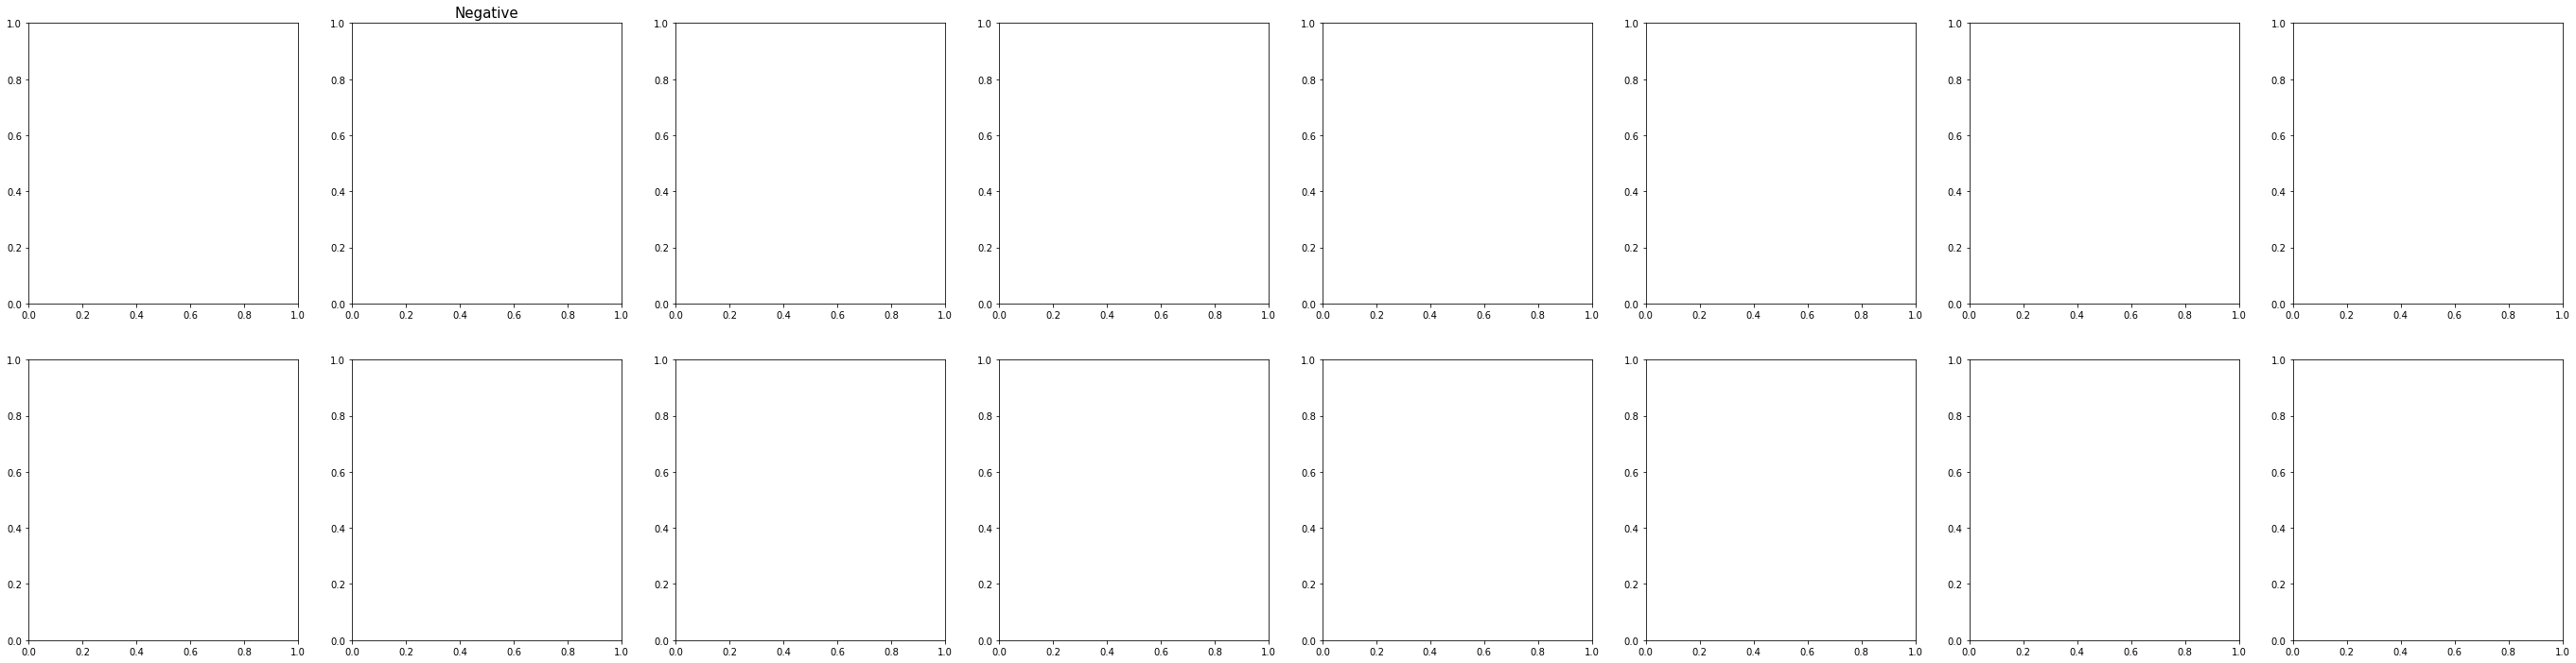

In [20]:
# In 2-d-matrix form showing the pixel values of the image.
import cv2
n_samples = 8

fig, m_axs = plt.subplots(2, n_samples, figsize = (6*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['corona_result']).groupby('corona_result')):
    n_axs[1].set_title(type_name, fontsize = 15)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
    
#imread converts the image in the matrix form of its pixels here 2-d matrix
        print(image)
        c_ax.imshow(image)
        c_ax.axis('off')

In [ ]:
#Basically displaying some data samples tagged as positive and negative.
n_samples = 8

fig, m_axs = plt.subplots(2, n_samples, figsize = (6*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['corona_result']).groupby('corona_result')):
    n_axs[1].set_title(type_name, fontsize = 15)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
#         print(image)
        c_ax.imshow(image)
    # Simply shows the image
        c_ax.axis('off')

In [ ]:
# Random Image Analysis
plt.figure()
image = cv2.imread("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
plt.imshow(image)
plt.axis('off')
plt.show()

# Edge Extraction

In [ ]:
# import numpy as np
# import cv2 as cv
# ori = image
# img = image
# gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# sift = cv.SIFT_create()
# kp, des = sift.detectAndCompute(gray,None)
# img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv.imshow('Original',ori) 
# cv.imshow('SIFT',image)
# if cv.waitKey(0) & 0xff == 27:
#     cv.destroyAllWindows()


#  This is a non free module and is patented


# scikit-learn imaging contour finding, returns a list of found edges
from skimage import measure 
import matplotlib.image as mpimg
img = mpimg.imread("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
contours = measure.find_contours(img, .8)

# from which we choose the longest one
contour = max(contours, key=len)

# let us see the contour that we hopefully found
plt.plot(contour[::,1], contour[::,0], linewidth=0.5)  # (I will explain this [::,x] later)
plt.imshow(img, cmap='Set3')
plt.show()

# cartesian to polar coordinates, just as the image shows above
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
plt.plot(polar_contour[::,1], polar_contour[::,0], linewidth=0.5)
plt.show()

# Structural Feature extraction

In [ ]:
# the below features is for this image image = cv2.imread
#("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
print('Image Shape: {}'.format(image.shape))
print('Image Height: {}'.format(image.shape[0]))
print('Image Width: {}'.format(image.shape[1]))
print('Image Dimension: {}'.format(image.ndim))
print('Image Size: {}kb'.format(image.size//1024))
print('Image Data Type: {}'.format(image.dtype))
print('Maximum RGB value of the image: {}'.format(image.max()))
print('Minimum RGB value of the image: {}'.format(image.min()))

In [ ]:
# B-channel
# Basically turn the B channel as 0 in R,G,B three channels
# the below features is for this image image = cv2.imread
#("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
plt.title('B channel', fontsize = 14)
plt.imshow(image[ : , : , 0])
plt.axis('off');
plt.show()

In [ ]:
# Ben Grahams Method
# First, we convert the images to greyscale and then apply Gaussian blur to them.
all_covid = []
all_normal = []

all_normal.extend(glob(os.path.join(path, "Normal/*.png")))
all_covid.extend(glob(os.path.join(path, "COVID/*.png")))

random.shuffle(all_normal)
random.shuffle(all_covid)

images = all_normal[:50] + all_covid[:50]

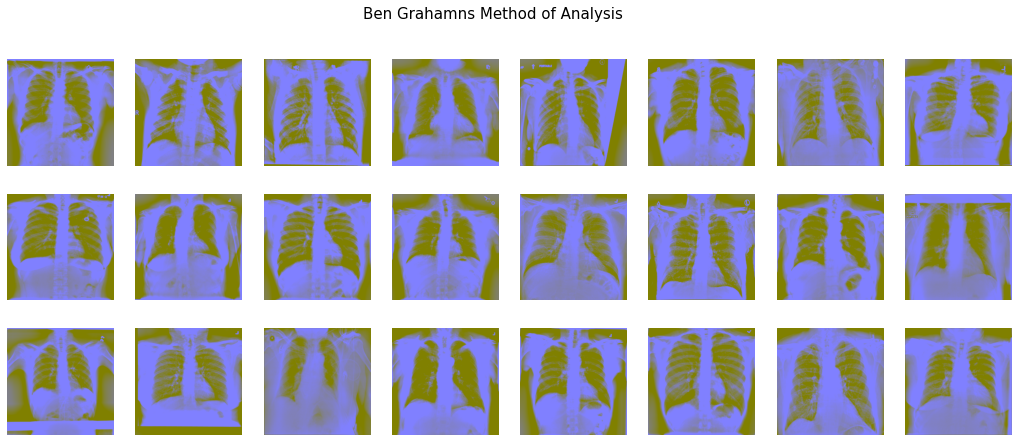

In [18]:
fig = plt.figure(figsize = (18, 7))
fig.suptitle("Ben Grahamns Method of Analysis", fontsize = 15)
columns = 8; rows = 3

for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)

# Statistical Feature Extraction


In [19]:
# We are finding the mean, standard deviation, max value, min value
mean_val = []
std_dev_val = []
max_val = []
min_val = []

for i in range(0, samples):
    mean_val.append(data['image'][i].mean())
    std_dev_val.append(np.std(data['image'][i]))
    max_val.append(data['image'][i].max())
    min_val.append(data['image'][i].min())

imageEDA = data.loc[:,['image','corona_result','path']]
imageEDA['mean'] = mean_val
imageEDA['stedev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

imageEDA['subt_mean'] = imageEDA['mean'].mean() - imageEDA['mean']

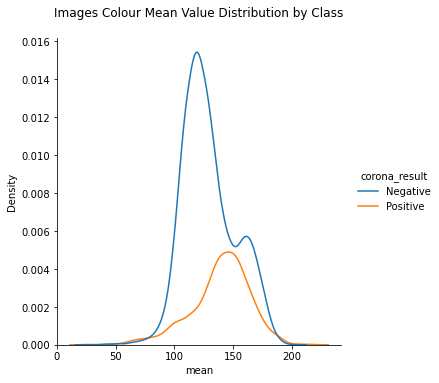

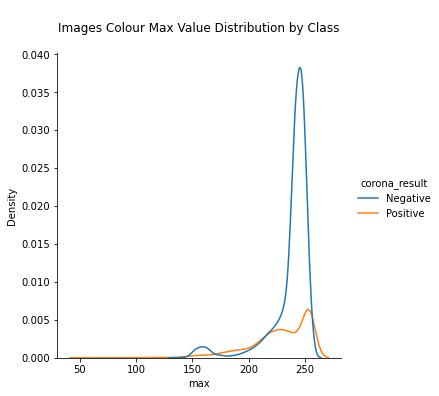

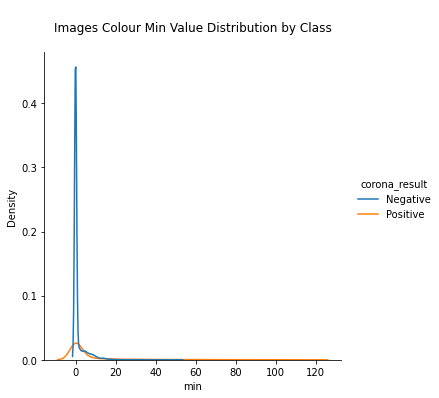

In [20]:
# The Mean vs Density plot insights for pixels:

# The max pixel value for Covid Negative cases is greater than 0.014 and less than 0.016.
# The max pixel value for Covid Positive cases is greater than 0.004 & less than 0.006.
ax1 = sns.displot(data = imageEDA, x = 'mean', kind="kde", hue = 'corona_result');
plt.title('Images Colour Mean Value Distribution by Class\n', fontsize = 12);


# The Max vs Density plot insights for pixels:

# The max pixel value for Covid Negative cases is greater than 0.035 and less than 0.040.
# The max pixel value for Covid Positive cases is 0.005.
ax2 = sns.displot(data = imageEDA, x = 'max', kind="kde", hue = 'corona_result');
plt.title('\nImages Colour Max Value Distribution by Class\n', fontsize = 12);


# The Min vs Density plot insights for pixels:

# The max pixel value for Covid Negative cases is greater than 0.4.
# The max pixel value for Covid Positive cases is greater than 0.0 and less than 0.1.
ax3 = sns.displot(data = imageEDA, x = 'min', kind="kde", hue = 'corona_result');
plt.title('\nImages Colour Min Value Distribution by Class\n', fontsize = 12);

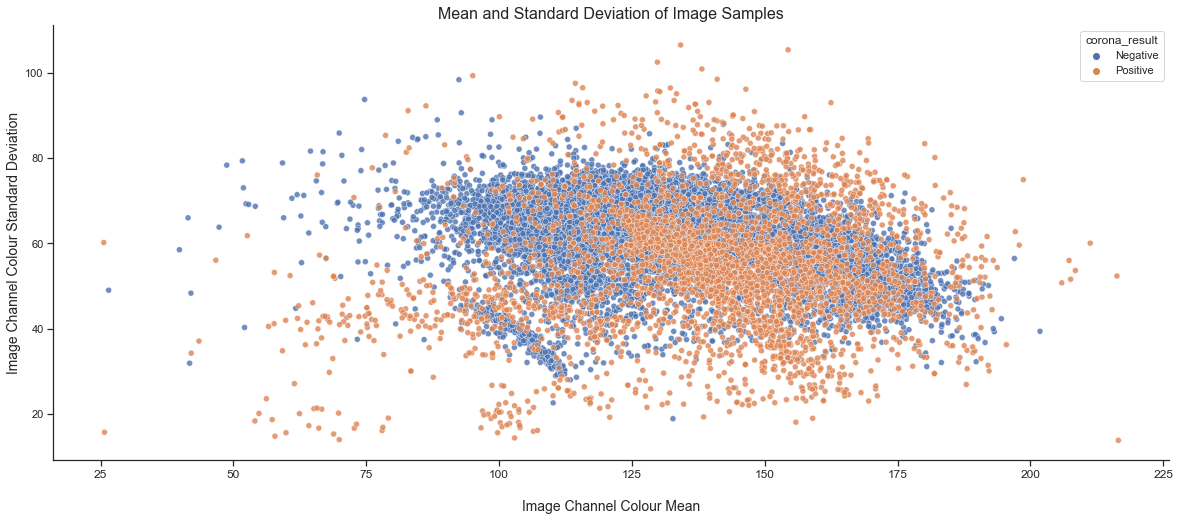

In [21]:
# We observe that there are 2 clusters formed, one for Covid Positive, one for Covid Negative and both have several 
# overlappings. Overlapping Color Mean range: (100 - 175)
# We observe that for pixels having Std Deviation below 30 are all Covid Positive Images (Orange Colored)
plt.figure(figsize = (20, 8))
sns.set(style = "ticks", font_scale = 1)
ax = sns.scatterplot(data = imageEDA, x = "mean", y = imageEDA['stedev'], hue = 'corona_result', alpha = 0.8);
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation = 0, fontsize = 12)
ax.set_xlabel('\nImage Channel Colour Mean', fontsize = 14)
ax.set_ylabel('Image Channel Colour Standard Deviation', fontsize = 14)
plt.title('Mean and Standard Deviation of Image Samples', fontsize = 16);

<Figure size 720x576 with 0 Axes>

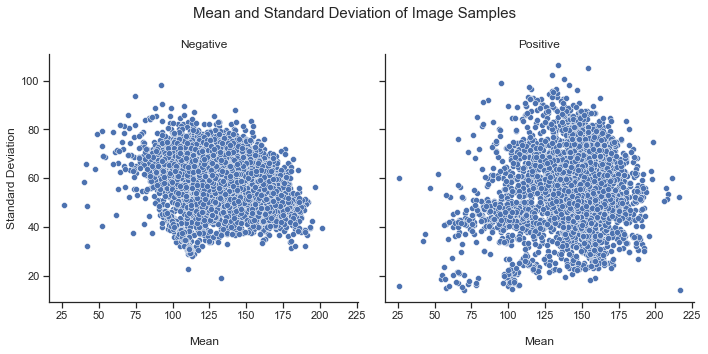

In [22]:
# Comparing both Scatter plots, we observe that Postivie Samples have outliers (pixel points).
plt.figure(figsize = (10, 8));
g = sns.FacetGrid(imageEDA, col = "corona_result", height = 5);
g.map_dataframe(sns.scatterplot, x = 'mean', y = 'stedev');
g.set_titles(col_template = "{col_name}", row_template= "{row_name}", size = 12);
g.fig.subplots_adjust(top = .7);
g.fig.suptitle('Mean and Standard Deviation of Image Samples', fontsize = 15);
axes = g.axes.flatten();
axes[0].set_ylabel('Standard Deviation');
for ax in axes:
    ax.set_xlabel('\nMean');
g.fig.tight_layout();

# Global Transformation and Moment

Image


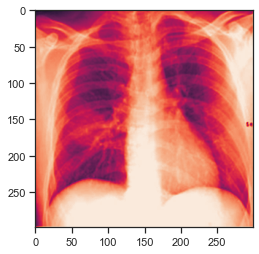

[0.31830989 0.00687837 0.00730727 0.00349976 0.01619357 0.01141729
 0.00397217 0.00850547 0.01002872 0.02337602 0.01401566 0.01708387
 0.00883704 0.00713143 0.01670989 0.00672929 0.03415569 0.02001315
 0.02225406 0.02802471 0.00811987 0.00717657 0.02015681 0.00576239
 0.00957037]


In [23]:
# importing required libraries
import mahotas
import mahotas.demos
from pylab import gray, imshow, show
import numpy as np
import matplotlib.pyplot as plt
   
# loading image
# img = mahotas.demos.load('nuclear')
   
# filtering image
img = image.max(2)
 
print("Image")
   
# showing image
imshow(img)
show()
 
# radius
radius = 10
 
# computing zernike moments
value = mahotas.features.zernike_moments(img, radius)
  
# printing value
print(value)

In [24]:
# Gabor filter 
# https://scikit-image.org/docs/0.11.x/auto_examples/plot_gabor.html
# Please Explain could not understand

In [1]:
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as nd

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = nd.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i


# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)


shrink = (slice(0, None, 3), slice(0, None, 3))
img1 = mpimg.imread("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
img2 = mpimg.imread("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1003.png")
img3 = mpimg.imread("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1004.png")
brick = img_as_float(img1)[shrink]
grass = img_as_float(img1)[shrink]
wall = img_as_float(img1)[shrink]
image_names = ('brick', 'grass', 'wall')
images = (brick, grass, wall)

# prepare reference features
ref_feats = np.zeros((3, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(brick, kernels)
ref_feats[1, :, :] = compute_feats(grass, kernels)
ref_feats[2, :, :] = compute_feats(wall, kernels)

print('Rotated images matched against references using Gabor filter banks:')

print('original: brick, rotated: 30deg, match result: ', end='')
feats = compute_feats(nd.rotate(brick, angle=190, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: brick, rotated: 70deg, match result: ', end='')
feats = compute_feats(nd.rotate(brick, angle=70, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: grass, rotated: 145deg, match result: ', end='')
feats = compute_feats(nd.rotate(grass, angle=145, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])


def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(nd.convolve(image, np.real(kernel), mode='wrap')**2 +
                   nd.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in (0, 1):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.4):
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(5, 6))
plt.gray()

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

axes[0][0].axis('off')

# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel), interpolation='nearest')
    ax.set_ylabel(label, fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

plt.show()

NameError: name 'mpimg' is not defined

In [ ]:
import numpy as np
import matplotlib.image as mpimg
from mahotas.features import surf

f =mpimg.imread("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
spoints = surf.surf(f)
print("Nr points: {}".format(len(spoints)))

In [2]:
# import mahotas.demos
# import matplotlib.image as mpimg
# photo = mpimg.imread("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
# photo = photo.astype(np.uint8)

# Thresholding

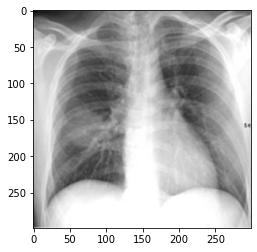

In [6]:
import mahotas
import mahotas.demos
import matplotlib.image as mpimg
import numpy as np
from pylab import imshow, gray, show
from os import path

photo='C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png'
photo = mahotas.imread(photo, as_grey=True)
photo = photo.astype(np.uint8)

# luispedro_image = '../../mahotas/demos/data/luispedro.jpg'
# photo = mahotas.imread(luispedro_image, as_grey=True)
gray()
imshow(photo)
show()

170


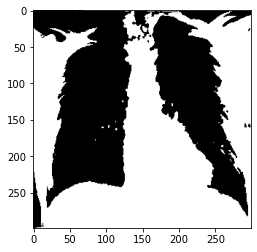

In [7]:
# Thresholding functions have a trivial interface: they take an image and return a value. One of the most well-known thresholding methods is Otsu’s method:
T_otsu = mahotas.otsu(photo)
print(T_otsu)
gray()
imshow(photo > T_otsu)
show()


# An alternative is the Riddler-Calvard method:

170.49721016612799


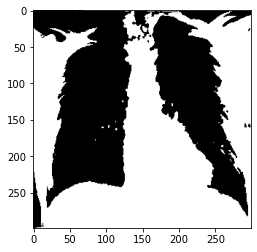

In [8]:
T_rc = mahotas.rc(photo)
print(T_rc)
gray()
imshow(photo > T_rc)
show()

In [11]:
# importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure



#reading the image
img = imread('C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png')
#resize image
resized_img = resize(img, (128,64))

#generating HOG features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
cells_per_block=(2, 2), visualize=True, multichannel=True)

print('\n\nShape of Image Features\n\n')
print(fd.shape)

ValueError: Only images with 2 spatial dimensions are supported. If using with color/multichannel images, specify `multichannel=True`.

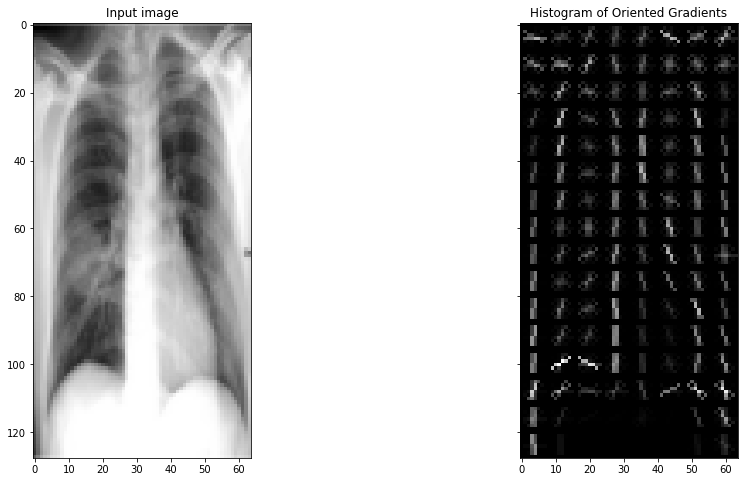

In [12]:
# Histogram of Oriented Gradients (HOG) Feature

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [ ]:
# Pending
# Haar Cascades features extractions
import cv2
import numpy as np
import matplotlib.pyplot as plt % matplotlib inline
# Read in the cascade classifiers for face and eyes
face_cascade = cv2.CascadeClassifier('../DATA / haarcascades / haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../DATA / haarcascades / haarcascade_eye.xml')
# create a function to detect face
def adjusted_detect_face(img):
     
    face_img = img.copy()
     
    face_rect = face_cascade.detectMultiScale(face_img,
                                              scaleFactor = 1.2,
                                              minNeighbors = 5)
     
    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_img, (x, y),
                      (x + w, y + h), (255, 255, 255), 10)\
         
    return face_img
 
 
# create a function to detect eyes
def detect_eyes(img):
     
    eye_img = img.copy()   
    eye_rect = eye_cascade.detectMultiScale(eye_img,
                                            scaleFactor = 1.2,
                                            minNeighbors = 5)   
    for (x, y, w, h) in eye_rect:
        cv2.rectangle(eye_img, (x, y),
                      (x + w, y + h), (255, 255, 255), 10)       
    return eye_img
 
# Reading in the image and creating copies
img = cv2.imread('../sachin.jpg')
img_copy1 = img.copy()
img_copy2 = img.copy()
img_copy3 = img.copy()
 
# Detecting the face
face = adjusted_detect_face(img_copy)
plt.imshow(face)
# Saving the image
cv2.imwrite('face.jpg', face)

In [18]:
# SURF
import cv
img = cv.imread('C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png',0)

ModuleNotFoundError: No module named 'cv'

In [22]:
from cv2 import cv2
surf = cv2.xfeatures2d.SURF_create(400)

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [ ]:
kp, des = surf.detectAndCompute(img,None)

In [ ]:
len(kp)

In [ ]:
print( surf.getHessianThreshold() )

In [ ]:
surf.setHessianThreshold(50000)

In [ ]:
kp, des = surf.detectAndCompute(img,None)

In [ ]:
print( len(kp) )

In [ ]:
print( surf.getUpright() )

In [ ]:
surf.setUpright(True)

In [ ]:
kp = surf.detect(img,None)

In [ ]:
mg2 = cv.drawKeypoints(img,kp,None,(255,0,0),4)

In [ ]:
plt.imshow(img2),plt.show()